# **Launch Sites Locations Analysis with Folium**


The launch success rate may depend on many factors such as : 
- payload mass 
- orbit type 
- the location and proximities of a launch site
- the initial position of rocket trajectories. 
- etc.

**Finding an optimal location for building a launch site** certainly involves many factors and hopefully we could discover some of the factors by analyzing the existing launch site locations.

## Objectives

This notebook contains the following tasks:

*   **TASK 1:** Mark all launch sites on a map
*   **TASK 2:** Mark the success/failed launches for each site on the map
*   **TASK 3:** Calculate the distances between a launch site to its proximities

After completed the above tasks, you should be able to find some geographical patterns about launch sites.

## Libraries 

In [105]:
!pip3 install folium
!pip3 install wget

In [106]:
import folium # Python library used for visualizing geospatial data 
import wget # networking command-line tool that lets you download files and interact with REST APIs
import pandas as pd # provides fast, flexible, and expressive data structures designed

In [107]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

## Task 1: Mark all launch sites on a map


First, let's try to add each site's location on a map using site's latitude and longitude coordinates

The following dataset with the name `spacex_launch_geo.csv` is an augmented dataset with latitude and longitude added for each site.

In [108]:
# Download and read the 'spacex_launch_geo.csv'
spacex_df = pd.read_csv('spacex_launch_geo.csv')
spacex_df.head(3)

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356


Now, you can take a look at what are the coordinates for each site.


In [109]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
spacex_df.head(3)

,Launch Site,Lat,Long,class
0,CCAFS LC-40,28.562302,-80.577356,0
1,CCAFS LC-40,28.562302,-80.577356,0
2,CCAFS LC-40,28.562302,-80.577356,0


In [110]:
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df

,Launch Site,Lat,Long,class
0,CCAFS LC-40,28.562302,-80.577356,0
1,CCAFS SLC-40,28.563197,-80.576820,1
2,KSC LC-39A,28.573255,-80.646895,1
3,VAFB SLC-4E,34.632834,-120.610746,0


In [111]:
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610746


Above coordinates are just plain numbers that can not give you any intuitive insights about where are those launch sites. If you are very good at geography, you can interpret those numbers directly in your mind. If not, that's fine too. Let's visualize those locations by pinning them on a map.

We first need to create a folium `Map` object, with an initial center location to be NASA Johnson Space Center at Houston, Texas.

In [112]:
# Start Location is NASA Johnson Space Center
# You can google the coordinate [lat, long] of NASA Johnson Space Center
nasa_coordinate = [29.561512529747, -95.0954246521]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

We could use `folium.Circle` to add a highlighted circle area with a text label on a specific coordinate.

In [113]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))

# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

and you should find a small yellow circle near the city of Houston and you can zoom-in to see a larger circle.

Now, let's add a circle for each launch site in data frame `launch_sites`

*TODO:*  Create and add `folium.Circle` and `folium.Marker` for each launch site on the site map

In [114]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=4)

# For each launch site, add a Circle object based on its coordinate 
# (Lat, Long) values. In addition, add Launch site name as a popup label
CCAFS_LC_40 = [28.562302, -80.577356]
CCAFS_SLC_40 = [28.563197, -80.576820]
KSC_LC_39A = [28.573255, -80.646895]
VAFB_SLC_4E = [34.632834, -120.610746]

# Create a blue circle for launch site CCAFS_LC_40
circle1 = folium.Circle(CCAFS_LC_40, radius=1000, color='#6F38C5', fill=True).add_child(folium.Popup('CCAFS_LC_40'))
marker1 = folium.map.Marker(
    CCAFS_LC_40,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#6F38C5;"><b>%s</b></div>' % 'CCAFS_LC_40',
        )
    )

site_map.add_child(circle1)
site_map.add_child(marker1)

# Create a blue circle for launch site CCAFS_SLC_40
circle2 = folium.Circle(CCAFS_SLC_40, radius=1000, color='#6F38C5', fill=True).add_child(folium.Popup('CCAFS_LC_40'))
marker2 = folium.map.Marker(
    CCAFS_SLC_40,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#6F38C5;"><b>%s</b></div>' % 'CCAFS_SLC_40',
        )
    )

site_map.add_child(circle2)
site_map.add_child(marker2)

# Create a blue circle for launch site KSC_LC_39A
circle3 = folium.Circle(KSC_LC_39A, radius=1000, color='#6F38C5', fill=True).add_child(folium.Popup('CCAFS_LC_40'))
marker3 = folium.map.Marker(
    KSC_LC_39A,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#6F38C5;"><b>%s</b></div>' % 'KSC_LC_39A',
        )
    )

site_map.add_child(circle3)
site_map.add_child(marker3)

# Create a blue circle for launch site KSC_LC_39A
circle4 = folium.Circle(VAFB_SLC_4E, radius=1000, color='#6F38C5', fill=True).add_child(folium.Popup('CCAFS_LC_40'))
marker4 = folium.map.Marker(
    VAFB_SLC_4E,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#6F38C5;"><b>%s</b></div>' % 'VAFB_SLC_4E',
        )
    )

site_map.add_child(circle4)
site_map.add_child(marker4)

Now, you can explore the map by zoom-in/out the marked areas
, and try to answer the following questions:

*   Are all launch sites in proximity to the Equator line?
*   Are all launch sites in very close proximity to the coast?

Also please try to explain your findings.

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\johan\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['cos', 'sin', 'radians', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


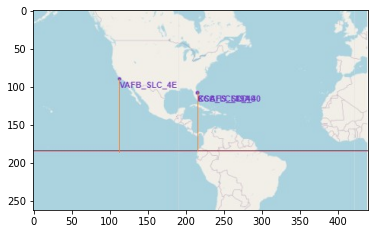

In [115]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('Launch Site - Equator Line.jpg')
imgplot = plt.imshow(img)
plt.show()

- From image above, we can see that all launch sites are not far from Equator Line. So, the distance from earth to space is actually the closest as they can be. That makes the fuel needed is fewer. 

- They also are close to the coast. All the launch sites in close to the coast is a good choice for safety reasons, it's far from where a lot of people live.

#  2: Mark the success/failed launches for each site on the map

Next, let's try to enhance the map by adding the launch outcomes for each site, and see which sites have high success rates.
Recall that data frame spacex_df has detailed launch records, and the `class` column indicates if this launch was successful or not

In [116]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


Next, let's create markers for all launch records.
If a launch was successful `(class=1)`, then we use a green marker and if a launch was failed, we use a red marker `(class=0)`

Note that a launch only happens in one of the four launch sites, which means many launch records will have the exact same coordinate. Marker clusters can be a good way to simplify a map containing many markers having the same coordinate.

Let's first create a `MarkerCluster` object

In [117]:
marker_cluster = MarkerCluster()

*TODO:* Create a new column in `launch_sites` dataframe called `marker_color` to store the marker colors based on the `class` value

In [118]:
# Apply a function to check the value of `class` column
# If class=1, marker_color value will be green
# If class=0, marker_color value will be red

spacex_df.loc[spacex_df['class'] == 0, 'marker_color'] = 'green'
spacex_df.loc[spacex_df['class'] == 1, 'marker_color'] = 'red'

spacex_df.tail()

,Launch Site,Lat,Long,class,marker_color
51,CCAFS SLC-40,28.563197,-80.57682,0,green
52,CCAFS SLC-40,28.563197,-80.57682,0,green
53,CCAFS SLC-40,28.563197,-80.57682,0,green
54,CCAFS SLC-40,28.563197,-80.57682,1,red
55,CCAFS SLC-40,28.563197,-80.57682,0,green


In [119]:
# Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
    
spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)
spacex_df.tail(10)

,Launch Site,Lat,Long,class,marker_color
46,KSC LC-39A,28.573255,-80.646895,1,green
47,KSC LC-39A,28.573255,-80.646895,1,green
48,KSC LC-39A,28.573255,-80.646895,1,green
49,CCAFS SLC-40,28.563197,-80.576820,1,green
50,CCAFS SLC-40,28.563197,-80.576820,1,green
51,CCAFS SLC-40,28.563197,-80.576820,0,red
52,CCAFS SLC-40,28.563197,-80.576820,0,red
53,CCAFS SLC-40,28.563197,-80.576820,0,red
54,CCAFS SLC-40,28.563197,-80.576820,1,green
55,CCAFS SLC-40,28.563197,-80.576820,0,red


*TODO:* For each launch result in `spacex_df` data frame, add a `folium.Marker` to `marker_cluster`

In [120]:
spacex_df.shape

(56, 5)

In [121]:
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed, 
# e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
for index, row in spacex_df.iterrows():
    # create and add a Marker cluster to the site map
    coordinate = [row['Lat'], row['Long']]
    folium.map.Marker(coordinate, icon=folium.Icon(color='white',icon_color=row['marker_color'])).add_to(marker_cluster)
site_map

# Warning : Run this cell only once, because it would accumulate 
# the result if we run more than once.
# However, if that happen, you could run cell all above to reset

Next, we need to explore and analyze the proximities of launch sites.


Let's first add a `MousePosition` on the map to get coordinate for a mouse over a point on the map. As such, while you are exploring the map, you can easily find the coordinates of any points of interests (such as railway)


In [122]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

- Now zoom in to a launch site and explore its proximity to see if you can easily find any railway, highway, coastline, etc.
- Move your mouse to these points and mark down their coordinates (shown on the top-left) in order to the distance to the launch site.

You can calculate the distance between two points on the map based on their `Lat` and `Long` values using the following method:

In [123]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0
    
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    
    distance = R * c
    return distance

Mark down a point on the closest coastline using MousePosition and calculate the distance between the coastline point and the launch site.

In [124]:
spacex_df.groupby('Launch Site').head(1)

,Launch Site,Lat,Long,class,marker_color
0,CCAFS LC-40,28.562302,-80.577356,0,red
26,VAFB SLC-4E,34.632834,-120.610746,0,red
36,KSC LC-39A,28.573255,-80.646895,1,green
49,CCAFS SLC-40,28.563197,-80.576820,1,green


#### Calculate the distance from coastline to Launch Site CCAFS LC-40

In [125]:
# find coordinate of the closet coastline
# e.g.,: Lat: 28.56367  Lon: -80.57163
# distance_coastline = calculate_distance ...
# (launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)

lat1 = 28.562302
lon1 = -80.577356

# Coordinate of the closest coastline
lat2 = 28.56398
lon2 = -80.56813

print("Distance coastline to Launch Site CCAFS LC-40 : ", 
      calculate_distance(lat1, lon1, lat2, lon2), "km")

Distance coastline to Launch Site CCAFS LC-40 :  0.9204299400160768 km


#### Calculate the distance from coastline to Launch Site VAFB SLC-4E	

In [126]:
lat1 = 34.632834
lon1 = -120.610746

# Coordinate of the closest coastline
lat2 = 34.63575
lon2 = -120.62524

print("Distance coastline to Launch Site VAFB SLC-4E : ",
      calculate_distance(lat1, lon1, lat2, lon2), "km")

Distance coastline to Launch Site VAFB SLC-4E :  1.3655619207911394 km


#### Calculate the distance from coastline to Launch Site KSC LC-39A	

In [127]:
lat1 = 28.573255
lon1 = -80.646895

# Coordinate of the closest coastline
lat2 = 28.56398
lon2 = -80.56813

print("Distance coastline to Launch Site KSC LC-39A : ",
      calculate_distance(lat1, lon1, lat2, lon2), "km")

Distance coastline to Launch Site KSC LC-39A :  7.763174593390003 km


#### Calculate the distance from coastline to Launch Site CCAFS SLC-40	(the closest)

In [128]:
lat1 = 28.563197
lon1 = -80.576820
launch_site_lat = lat1
launch_site_lon = lon1

# Coordinate of the closest coastline
lat2 = 28.56398
lon2 = -80.56813
coastline_lat = lat2
coastline_lon = lon2 

distance_coastline = calculate_distance(lat1, lon1, lat2, lon2)

print("Distance coastline to Launch Site CCAFS SLC-40	 : ",
      calculate_distance(lat1, lon1, lat2, lon2), "km")

Distance coastline to Launch Site CCAFS SLC-40	 :  0.8533967686175881 km


After obtained its coordinate, create a `folium.Marker` to show the distance

In [129]:
# Create and add a folium.Marker on your selected closest coastline point on the map
# Display the distance between coastline point and launch site using the icon property 
# for example
# distance_marker = folium.Marker(
#    coordinate,
#    icon=DivIcon(
#        icon_size=(20,20),
#        icon_anchor=(0,0),
#        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance),
#        )
#    )

distance_marker = folium.Marker(
   [coastline_lat, coastline_lon],
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_coastline),
       )
   )
site_map.add_child(distance_marker)

Draw a `PolyLine` between a launch site to the selected coastline point

In [130]:
# Create a `folium.PolyLine` object using the coastline coordinates and launch site coordinate
# lines=folium.PolyLine(locations=coordinates, weight=1)

coordinates = [[launch_site_lat,launch_site_lon],[coastline_lat,coastline_lon]]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

Similarly, you can draw a line betwee a launch site to its closest city, railway, highway, etc. You need to use `MousePosition` to find the their coordinates on the map first

A railway map symbol may look like this:

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/railway.png" />
</center>

A highway map symbol may look like this:

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/highway.png" />
</center>


A city map symbol may look like this:

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/city.png" />
</center>

In [131]:
# Create a marker with distance to a closest city, railway, highway, etc.
# Draw a line between the marker to the launch site

closest_highway = 28.56374, -80.57085
closest_railroad = 28.57208, -80.58527
closest_city = 28.10613, -80.63692

In [138]:
print('The distance between Launch Site and the closest : ')
distance_highway = calculate_distance(launch_site_lat, launch_site_lon, closest_highway[0], closest_highway[1])
print('highway (Samuel C. Phillips Pkwy) =',distance_highway, 'km')
distance_railroad = calculate_distance(launch_site_lat, launch_site_lon, closest_railroad[0], closest_railroad[1])
print('railroad (NASA Railroad) =',distance_railroad, 'km')
distance_city = calculate_distance(launch_site_lat, launch_site_lon, closest_city[0], closest_city[1])
print('city (Melbourne) =',distance_city, 'km')

The distance between Launch Site and the closest : 
highway (Samuel C. Phillips Pkwy) = 0.5863392499868134 km
railroad (NASA Railroad) = 1.287494261372127 km
city (Melbourne) = 51.178847393364904 km


In [139]:
# closest highway marker
distance_marker = folium.Marker(
   closest_highway,
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_highway),
       )
   )
site_map.add_child(distance_marker)
# closest highway line
coordinates = [[launch_site_lat,launch_site_lon],closest_highway]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

# closest railroad marker
distance_marker = folium.Marker(
   closest_railroad,
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_railroad),
       )
   )
site_map.add_child(distance_marker)
# closest railroad line
coordinates = [[launch_site_lat,launch_site_lon],closest_railroad]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

# closest city marker
distance_marker = folium.Marker(
   closest_city,
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_city),
       )
   )
site_map.add_child(distance_marker)
# closest city line
coordinates = [[launch_site_lat,launch_site_lon],closest_city]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

After you plot distance lines to the proximities, you can answer the following questions easily:

*   Are launch sites in close proximity to railways?
> Yes, It's only 0.6 km. This make people who work in NASA easier easy to get there. Also they do not need to live close around that area if they want to. We can draw conclusions that their place has an easy access to transportation. 
*   Are launch sites in close proximity to highways?
> Yes. It's only 1.3 km. This also make the access to get NASA launch can be done by private vehicle.
*   Are launch sites in close proximity to coastline?
> Yes. It's only 0.85 km. This close distance is good for unexpected events like the launch is failed.
*   Do launch sites keep certain distance away from cities?
> Yes. The distance to the closest city is 51.2 km. I think it's good to keep the distance to the city for safety reason.

